## Run BERT

Please check the colab notebook [BERT](https://colab.research.google.com/drive/1Ag9dsRPP5T7X1InQmOOFeUJzhBLQX2R9). The hyperparameter tunning is conducted completely on colab TPU.

## Generate plot for analysis.

In [43]:
import sys
import os

fnc = os.path.join(os.path.abspath("."), "fnc-1-baseline")
sys.path.append(fnc)

from utils.dataset import DataSet
from utils.generate_test_splits import kfold_split, get_stances_for_folds
from utils.score import report_score, LABELS, score_submission
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

#### Dataset plot

In [27]:
training = DataSet(path=os.path.join(fnc, "fnc-1"))
training_df = pd.DataFrame(data={"Headline": [s['Headline'] for s in training.stances], "Body ID": [s['Body ID'] for s in training.stances], "Stance": [s['Stance'] for s in training.stances]})
train_sts = training_df.groupby([training_df['Stance']]).count()
train_sts

Reading dataset
Total stances: 49972
Total bodies: 1683


,Headline,Body ID
Stance,,
agree,3678,3678
disagree,840,840
discuss,8909,8909
unrelated,36545,36545


#### F1 and FNC Score

In [28]:
competition = DataSet("competition_test", path=os.path.join(fnc, "fnc-1"))
actual = [stance['Stance'] for stance in competition.stances]
bilstm_att_cond = pd.read_csv("./fnc/result/bidirectional_LSTM_attention_conditional_encoding_submission.csv")
bilstm_att_cond_list = list(bilstm_att_cond.iloc[:,-1])

bilstm_att = pd.read_csv("./fnc/result/bidirectional_LSTM_attention_submission.csv")
bilstm_att_list = list(bilstm_att.iloc[:,-1])

bilstm = pd.read_csv("./fnc/result/bidirectional_LSTM_submission.csv")
bilstm_list = list(bilstm.iloc[:,-1])

grad = pd.read_csv("./fnc/result/grad_submission.csv")
grad_list = list(grad.iloc[:,-1])

gra_bert_pair = pd.read_csv("./fnc/result/gra_bert_pair_submission.csv")
gra_bert_pair_list = list(gra_bert_pair.iloc[:,-1])

gra_bert_only = pd.read_csv("./fnc/result/gra_bert_pair_only_submission.csv")
gra_bert_only_list = list(gra_bert_only.iloc[:,-1])

bert128 = pd.read_csv("./fnc/result/bert_128_submission.csv")
bert128_list = list(bert128.iloc[:,-1])

bert256 = pd.read_csv("./fnc/result/bert_256_submission.csv")
bert256_list = list(bert256.iloc[:,-1])

bert512 = pd.read_csv("./fnc/result/bert_512_submission.csv")
bert512_list = list(bert512.iloc[:,-1])

Reading dataset
Total stances: 25413
Total bodies: 904


In [49]:
print(accuracy_score(actual, gra_bert_only_list))
print(accuracy_score(actual, gra_bert_pair_list))
print(accuracy_score(actual, bert512_list))
print(bert512_score)
print(best_score)

0.8804548852949278
0.8830126313304214
0.9243694172274033
10247.5
11651.25


In [36]:
bilstm_att_cond_f1 = f1_score(actual, bilstm_att_cond_list, labels=LABELS, average=None)
bilstm_att_f1 = f1_score(actual, bilstm_att_list, labels=LABELS, average=None)
bilstm_f1 = f1_score(actual, bilstm_list, labels=LABELS, average=None)
grad_f1 = f1_score(actual, grad_list, labels=LABELS, average=None)
gra_bert_pair_f1 = f1_score(actual, gra_bert_pair_list, labels=LABELS, average=None)
gra_bert_only_f1 = f1_score(actual, gra_bert_only_list, labels=LABELS, average=None)
bert128_f1 = f1_score(actual, bert128_list, labels=LABELS, average=None)
bert256_f1 = f1_score(actual, bert256_list, labels=LABELS, average=None)
bert512_f1 = f1_score(actual, bert512_list, labels=LABELS, average=None)

In [37]:
bilstm_att_cond_score, _ = score_submission(actual, bilstm_att_cond_list)
bilstm_att_score, _ = score_submission(actual, bilstm_att_list)
bilstm_score, _ = score_submission(actual, bilstm_list)
grad_score, _ = score_submission(actual, grad_list)
gra_bert_pair_score, _ = score_submission(actual, gra_bert_pair_list)
gra_bert_only_score, _ = score_submission(actual, gra_bert_only_list)
bert128_score, _ = score_submission(actual, bert128_list)
bert256_score, _ = score_submission(actual, bert256_list)
bert512_score, _ = score_submission(actual, bert512_list)
best_score, _ = score_submission(actual,actual)

#### Score plot.

<Figure size 40960x30720 with 0 Axes>

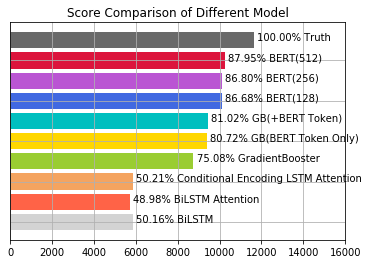

In [38]:
figure(num=None, figsize=(64, 48), dpi=640, facecolor='w', edgecolor='k')

fig, ax = plt.subplots()
names = ['BiLSTM', 'BiLSTM Attention', 'Conditional Encoding LSTM Attention', 'GradientBooster', 'GB(BERT Token Only)', 'GB(+BERT Token)', 'BERT(128)', 'BERT(256)', 'BERT(512)', 'Truth']
colors = ["lightgray", "tomato", "sandybrown", "yellowgreen", "gold", "c", "royalblue", "mediumorchid", "crimson", "dimgrey"]
score_list = [bilstm_score, bilstm_att_score, bilstm_att_cond_score, grad_score, gra_bert_only_score, gra_bert_pair_score, bert128_score, bert256_score, bert512_score, best_score]
# ax = pd.Series(score_list).plot(kind="bar")
ax.barh(range(10), score_list, color=colors)
rects = ax.patches

for i, x in enumerate(score_list):
    ax.text(x+150, i, "{0:.2f}% {1}".format(score_list[i]/best_score*100,names[i]))
    
xticks = list(range(0, 17000, 2000))
ax.set_xticks(xticks)
# ax.set_xticklabels()
ax.set_title("Score Comparison of Different Model")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
plt.grid()
plt.savefig("./fnc/result/score_comparison.png")
plt.show()

#### F1 plot

<Figure size 40960x30720 with 0 Axes>

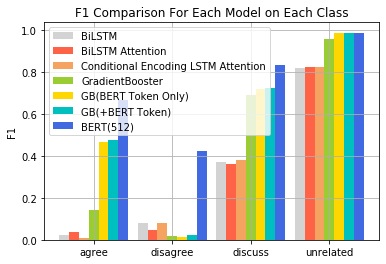

In [47]:
figure(num=None, figsize=(64, 48), dpi=640, facecolor='w', edgecolor='k')
ind = np.arange(0, 8, 2)  # the x locations for the groups
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind+width/2, bilstm_f1, width, label=names[0], color=colors[0])
rects2 = ax.bar(ind+width*1.5, bilstm_att_f1, width, label=names[1], color=colors[1])
rects3 = ax.bar(ind+width*2.5, bilstm_att_cond_f1, width, label=names[2], color=colors[2])
rects4 = ax.bar(ind+width*3.5, grad_f1, width, label=names[3], color=colors[3])
rects5 = ax.bar(ind+width*4.5, gra_bert_only_f1, width, label=names[4], color=colors[4])
rects6 = ax.bar(ind+width*5.5, gra_bert_pair_f1, width, label=names[5], color=colors[5])
rects7 = ax.bar(ind+width*6.5, bert512_f1, width, label='BERT(512)', color=colors[6])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1')
ax.set_title('F1 Comparison For Each Model on Each Class')
ax.set_xticks(ind+3.5*width)
ax.set_xticklabels(LABELS)
ax.legend()

# fig.tight_layout()
plt.grid()
plt.savefig("./fnc/result/f1.png")
plt.show()

## Encode sequence using BERT.

#### To extract features from BERT, it needs to start a backend of bert-as-service as following.(Run it in a seperate shell!!!) And then use the client to encode the concatenated sequence with client. Or use provided script "extracted_features.py" in BERT git repository. For detailed code please check colab notebook.

#### Since bert-as-service takes quite a long time, the extracted file "train_pair.npy" and "test_pair.npy" are actually produced by colab. The "extracted_features.py" first produce ".jsonl" file and then further converted to npy file. Therefore, the following code is just provided for reviewing. The code to extract feature from ".jsonl" is provided.

#### 128 tokens for the combined sequence of body and headline takes far too long even on TPU. Therefore, this is the only experiment we could try for now.

In [4]:
%cd ./fnc/model
!curl https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip --output uncased_L-12_H-768_A-12.zip
!unzip uncased_L-12_H-768_A-12.zip && rm uncased_L-12_H-768_A-12.zip
%cd ../../

/Users/0517qm/Documents/Course/MSCI 641/project/msci641_fnc/fnc/model
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  388M  100  388M    0     0  1602k      0  0:04:08  0:04:08 --:--:-- 1593k 0  1701k      0  0:03:53  0:00:18  0:03:35 1549k2003k0:47  0:03:14  746k0:57  0:03:02 1833k  0:01:00  0:02:59 1753k      0  0:04:04  0:01:30  0:02:34  532k 0     0  1587k      0  0:04:10  0:01:34  0:02:36  627k 0:04:05  0:01:43  0:02:22 1888k9k      0  0:04:07  0:03:00  0:01:07 1875k      0  0:04:03  0:03:14  0:00:49 1833k0  0:04:03  0:03:23  0:00:40 1612k:04:06  0:03:37  0:00:29 1376k
Archive:  uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_mo

In [ ]:
!bert-serving-start -model_dir ./fnc/model/uncased_L-12_H-768_A-12/ -num_worker=4 -max_seq_len=128 -pooling_strategy=CLS_TOKEN

In [118]:
from bert_serving.client import BertClient


def clean(s):
    return " ".join(re.findall(r'\w+', s, flags=re.UNICODE)).lower()


def transform_data(data_part, data, f_name, sep=False): 
    if not sep:
        x, y = [], []
        for stance in data_part:
            y.append(LABELS.index(stance['Stance']))  
            bert_str = clean(data.articles[stance['Body ID']])+" ||| "+clean(stance['Headline'])
            x.append(bert_str)
        with open(f_name, "w") as f:
            for s in x:
                f.write(s+"\n")
    else:
        f_head = "head_" + f_name
        f_body = "body_" + f_name
        h, b, y = [], [], []
        for stance in data_part:
            y.append(LABELS.index(stance['Stance']))  
            h.append(clean(stance['Headline']))
            b.append(clean(data.articles[stance['Body ID']]))
        with open(f_head, "w") as f:
            for s in h:
                f.write(s+"\n")
        with open(f_body, "w") as f:
            for s in b:
                f.write(s+"\n")
            

def transform(data_part, data):
    x, y = [], []
    for stance in data_part:
        y.append(LABELS.index(stance['Stance']))  
        bert_str = clean(data.articles[stance['Body ID']])+" ||| "+clean(stance['Headline'])
        x.append(bert_str)
    return x, y
            
competition = DataSet(name="competition_test", path="./fnc-1-baseline/fnc-1")
data = DataSet(path="./fnc-1-baseline/fnc-1")
# transform_data(data.stances, data, "./fnc/data/pair_token.tsv")
# transform_data(competition.stances, competition, "./fnc/data/competition_pair.tsv")

com_x, com_y = transform(competition.stances, competition)
train_x, train_y = transform(data.stances, data)

bc = BertClient()
encoded_train_x = bc.encode(train_x)
encoded_com_x = bc.encode(com_x)
np.save("./fnc-1-baseline/features/train_pair.npy")
np.save("./fnc-1-baseline/features/test_pair.npy")

Reading dataset
Total stances: 25413
Total bodies: 904
Reading dataset
Total stances: 49972
Total bodies: 1683


#### Convert jsonl to npy

Save the extracted CLS token representation as new features for gradient booster.

In [142]:
import json


com_val = []
with open("./fnc/data/competition_pair.jsonl", "r") as f:
    s = f.readlines()
    for i in s:
        com_val.append(json.loads(i)['features'][0]['layers'][0]['values'])
np.save("./fnc-1-baseline/features/test_pair.npy", np.array(com_val))

train_val = []
with open("./fnc/data/pair.jsonl", "r") as f:
    s = f.readlines()
    for i in s:
        train_val.append(json.loads(i)['features'][0]['layers'][0]['values'])
np.save("./fnc-1-baseline/features/train_pair.npy", np.array(train_val))

## Run GradientBoost.

In [ ]:
%cd fnc-1-baseline/
!pwd
!python grad_bert.py
%cd ..